<a href="https://colab.research.google.com/github/ykitaguchi77/YOLACT_Mobius/blob/main/Create_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLACT_Mobius_ocular_dataset**

Create YOLACT instance segentation model for periocular area, trained using Mobius ocular dataset

https://sclera.fri.uni-lj.si/datasets.html

In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
mask_path = "/content/drive/MyDrive/Deep_learning/YOLACT_Mobius_ocular_dataset/sample_mask.png"

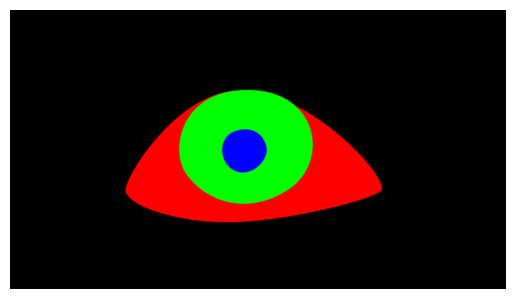

In [5]:
# 画像を読み込む
image = cv2.imread(mask_path)

# OpenCVでは画像はBGRフォーマットで読み込まれるので、RGBフォーマットに変換
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.imshow(image)
plt.axis('off') # 軸を非表示に
plt.show()

In [2]:
r = np.array([0, 0, 255])
g = np.array([0, 0, 255])
b = np.array([0, 0, 255])

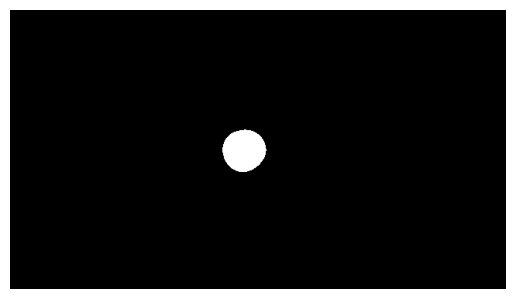

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with your image file)
img = cv2.imread(mask_path)

# Define the color to replace (blue in this case)
target_color = [255, 0, 0]  # Blue color in RGB

# Create a mask for where the image matches the target color
mask = np.all(img == target_color, axis=-1)

# Create a new image array: white where the mask is True, black elsewhere
new_img_array = np.zeros_like(img)
new_img_array[mask] = [255, 255, 255]  # White
new_img_array[~mask] = [0, 0, 0]       # Black

# Display the image
plt.imshow(new_img_array)
plt.axis('off')
plt.show()


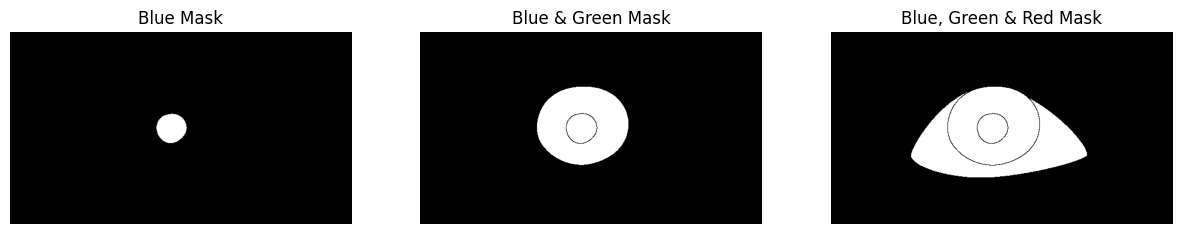

In [10]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with your image file)
img = cv2.imread(mask_path)

# Function to create a mask for a given color
def create_mask_for_color(image, color):
    return np.all(image == color, axis=-1)

# Create masks for blue, green, and red
mask_blue = create_mask_for_color(img, [255, 0, 0])  # Blue
mask_green = create_mask_for_color(img, [0, 255, 0]) # Green
mask_red = create_mask_for_color(img, [0, 0, 255])   # Red

# Combine masks for blue and green, and for blue, green, and red
mask_blue_green = np.logical_or(mask_blue, mask_green)
mask_all_colors = np.logical_or(mask_blue_green, mask_red)

# Function to apply a mask to an image
def apply_mask(image, mask):
    new_img = np.zeros_like(image)
    new_img[mask] = [255, 255, 255] # White
    return new_img

# Apply masks to create new images
img_blue = apply_mask(img, mask_blue)
img_blue_green = apply_mask(img, mask_blue_green)
img_all_colors = apply_mask(img, mask_all_colors)

# Display the images using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB))
axes[0].set_title('Blue Mask')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_blue_green, cv2.COLOR_BGR2RGB))
axes[1].set_title('Blue & Green Mask')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(img_all_colors, cv2.COLOR_BGR2RGB))
axes[2].set_title('Blue, Green & Red Mask')
axes[2].axis('off')

plt.show()


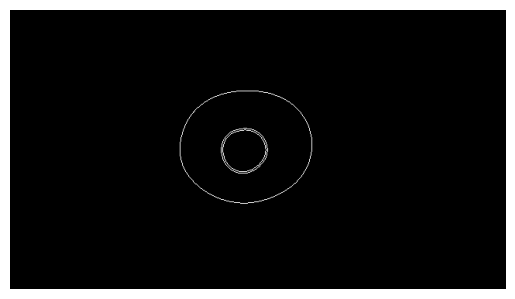

In [16]:
# 輪郭を検出する前に、画像をグレースケールに変換
img_blue_gray = cv2.cvtColor(img_blue_green, cv2.COLOR_BGR2GRAY)

# 輪郭を検出
contours, _ = cv2.findContours(img_blue_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 元の画像に輪郭を描画
contoured_image = np.zeros_like(img_blue_gray)
cv2.drawContours(contoured_image, contours, -1, (255, 255, 255), 1)

# 画像の表示
plt.imshow(contoured_image, cmap='gray')
plt.axis('off')
plt.show()

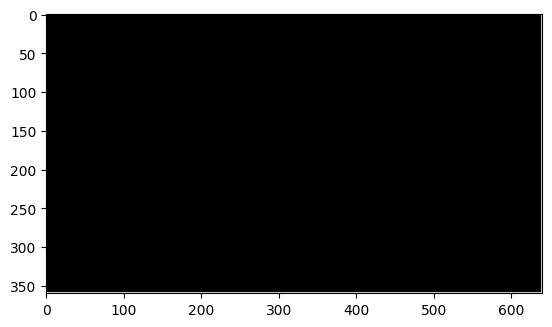

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = img_blue_gray

# 黒と白の画像のため、閾値処理は不要
# 白色の部分を抽出するために反転
inverted_image = cv2.bitwise_not(image)

# 輪郭を検出
contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭を描画するための空の画像を作成
contour_image = np.zeros_like(image)

# 輪郭を描画
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 1)

# 輪郭画像を表示
plt.imshow(contour_image, cmap='gray')
plt.show()
